## Scrape of top 10 songs for artists in LastFM

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import multiprocessing as mp
import re 

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait   
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver import ActionChains as AC   
from selenium.webdriver.common.keys import Keys  
from joblib import Parallel, delayed
from glob import glob

import time

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from mutagen.easyid3 import EasyID3

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

opciones=Options()
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False) 
opciones.add_argument('--start-maximized')
#opciones.add_argument('--incognito')

c:\Users\jorge\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#### Initialize Driver

In [2]:
PATH=ChromeDriverManager().install()
driver=webdriver.Chrome(PATH, options=opciones) 

#### Driver Shorthand

In [3]:
#find element
f = lambda x, y=driver : y.find_element(By.XPATH, x)
#find elements
fs = lambda x, y=driver : y.find_elements(By.XPATH, x)
#find and prepare to click
fc = lambda x, y=driver : y.find_element(By.XPATH, x).click()

#### Scraping Utilities

In [4]:
url = 'https://www.last.fm/music/'

# HTML XPATH values
cookies_XPATH = '//*[@id="onetrust-accept-btn-handler"]'
change_period_XPATH = '//*[@id="top-tracks"]/div[1]/button[2]'
all_songs_XPATH = '//*[@id="top-tracks-sort"]/li[6]/a'
row_XPATH = '//*[@id="top-tracks"]/div[2]/table/tbody//tr'

In [5]:
#Cleaning functions (for use in the scrapper)
def trim_row(row:list):
    '''
    Only used as part of scrapper function
    
    Selects only the rows that we want from the table
    '''
    new = []
    new.append(row[0])
    new.append(row[4])
    new.append(row[7])
    return new

def row_clean(row:list):
    '''
    Only used as part of scrapper function
    
    Cleans up the row items to a better format
    '''
    new = []
    new.append(int(row[0]))
    new.append(row[1])
    temp = row[2].replace(',','')
    new.append(int(temp.split()[0]))
    return new

### Scraper

In [6]:
top_10_paths = dict()

cols = ['Rank','Track_Name','Listeners']

def top_10_scrapper(artist:str):
    '''
    Scrapes through "lastfm.com" to find the top 10 most listened to
    songs for the given artist. Saves the information to parquet.
    
    Method:
    1) Navigates the website (accepts cookies, selects table)
    2) Clean table rows and add to pandas dataframe
    3) Export to .parquet and saves the file path to top_10_paths
    
    '''
    
    artist = artist.replace(' ','_')
    art = url+artist.replace('_','+')
    driver.get(art)
    # Accept cookies
    time.sleep(1)
    fc(cookies_XPATH)
    # Select top 10 of all time
    time.sleep(1)
    fc(change_period_XPATH)
    time.sleep(1)
    fc(all_songs_XPATH)
    # Select the top 10 table
    time.sleep(2)

    elements = list(map(row_clean,[[j.text for j in row] for row in [trim_row(fs('td',i)) for i in fs(row_XPATH)]]))
    # insert into dataframe and add artist name for safekeeping
    time.sleep(2)
    df = pd.DataFrame(elements,columns=cols)
    df['Artist'] = artist
    # file path
    path = '../data/tops/' + artist + '.parquet'
    # To dictionary and to parquet for safekeeping
    df.to_parquet( path ,index=False)
    top_10_paths[artist] = path
    return 'Uploaded ' + artist

In [7]:
#cpus = mp.cpu_count()-1

In [8]:
#Parallel(n_jobs=cpus, verbose=True)(delayed(extraer)(x) for x in equipos_stats_urls)

In [ ]:
audio_files = glob('../data/videos/*.mp3')

In [ ]:
ipd.Audio(audio_files[0])

In [ ]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-2.8768149e-05 -2.7202372e-03 -5.7711373e-03 -9.7736316e-03
 -1.5760167e-02 -1.9877702e-02 -2.1507731e-02 -2.2346316e-02
 -2.2627240e-02 -2.3544520e-02]
shape y: (881416,)
sr: 22050


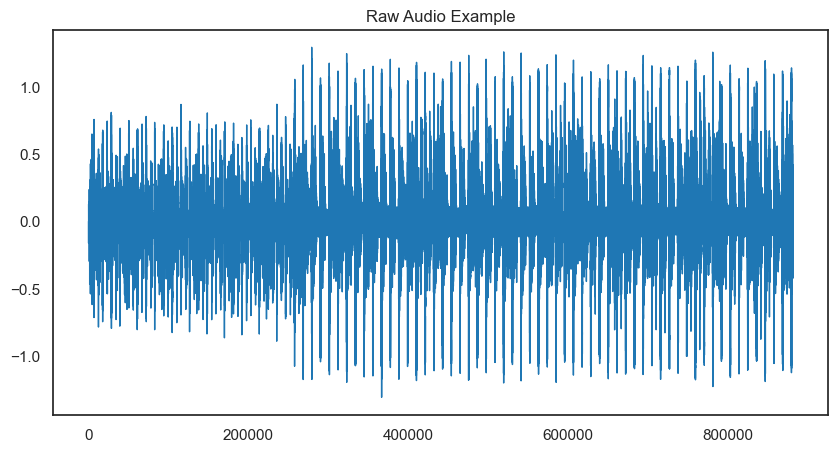

In [ ]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [ ]:


audio = EasyID3(r'C:\Users\jorge\Ironhack\Projects\Scraping-Project\data\videos\Daft Punk - Around the World (Official Audio).mp3')


In [ ]:
audio.keys()

['title', 'artist', 'tracknumber', 'date']